In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Grid search 1

In [2]:
# Read simulation outputs

# SSE
file = open('../output/tuning/nom_output_error_1.obj', 'rb')
nom_error1 = pickle.load(file)
nom_error1_df = pd.DataFrame(nom_error1)

file = open('../output/tuning/com_output_error_1.obj', 'rb')
com_error1 = pickle.load(file)
com_error1_df = pd.DataFrame(com_error1)

# individual output
file = open('../output/tuning/nom_output_child_1.obj', 'rb')
nom_child1 = pickle.load(file)

file = open('../output/tuning/com_output_child_1.obj', 'rb')
com_child1 = pickle.load(file)


In [3]:
# SSE of all parameter combinations
nom_error1_df = nom_error1_df.round(decimals=3)
nom_error1_df = nom_error1_df.pivot(index=0, columns=1,values=2)

com_error1_df = com_error1_df.round(decimals=3)
com_error1_df = com_error1_df.pivot(index=0, columns=1,values=2)


In [4]:
# Proportion of participants changing PAL in nomination network

proplist = []

for dat in nom_child1:
    datlist = []
    for key in dat:
        datlist.append(dat[key])

    res_ind = pd.concat(datlist, axis=1)
    dif = res_ind.iloc[1999] - res_ind.iloc[0]
    proplist.append(dif[dif != 0].count()/dif.count())

prop = pd.DataFrame(proplist)
result_prop = pd.DataFrame(nom_error1)
result_prop["prop"] = prop

nom_prop_df = pd.DataFrame(result_prop).pivot(index=0, columns=1,values="prop")

In [5]:
# Proportion of participants changing PAL in communication network

proplist = []

for dat in com_child1:
    datlist = []
    for key in dat:
        datlist.append(dat[key])

    res_ind = pd.concat(datlist, axis=1)
    dif = res_ind.iloc[1999] - res_ind.iloc[0]
    proplist.append(dif[dif != 0].count()/dif.count())

prop = pd.DataFrame(proplist)
result_prop = pd.DataFrame(com_error1)
result_prop["prop"] = prop

com_prop_df = pd.DataFrame(result_prop).pivot(index=0, columns=1,values="prop")

/Users/davidblok/.pyenv/versions/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/davidblok/.pyenv/versions/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator


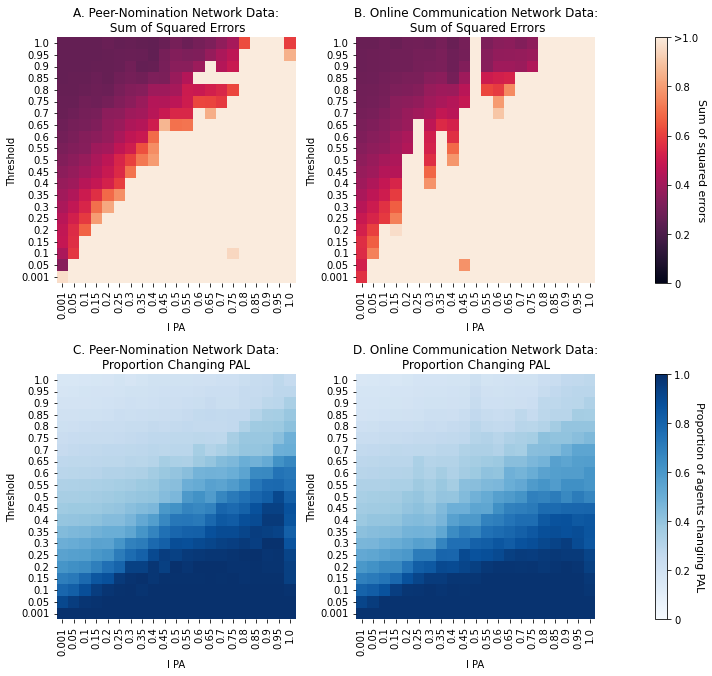

In [6]:
# plot heatmap of grid search 1

fig, axs = plt.subplots(2, 3, figsize=(10,9.5), gridspec_kw=dict(width_ratios=[1,1,0.05]))
#fig.suptitle('Grid Search (Sum of Squared Errors)')

#kwargs = {'alpha':1,'linewidth':0.5,'linecolor':'k','rasterized':True, 'edgecolor':'k', 'capstyle':'projecting'}
axs[0,0].set_title('A. Peer-Nomination Network Data:\n Sum of Squared Errors')
sns.heatmap(nom_error1_df, vmin=0, vmax=1, ax = axs[0,0], cbar=False).invert_yaxis()
axs[0,0].set_xlabel('I PA')
axs[0,0].set_ylabel('Threshold')

axs[0,1].set_title('B. Online Communication Network Data:\n Sum of Squared Errors')
sns.heatmap(com_error1_df, vmin=0, vmax=1, ax = axs[0,1], cbar=False).invert_yaxis()
axs[0,1].set_xlabel('I PA')
axs[0,1].set_ylabel('Threshold')

cbar = fig.colorbar(axs[0,1].collections[0], cax=axs[0,2])
cbar.ax.set_yticklabels(['0','0.2','0.4','0.6', '0.8', '>1.0 '])
cbar.set_label('Sum of squared errors', fontsize=11, rotation=270)


axs[1,0].set_title('C. Peer-Nomination Network Data:\nProportion Changing PAL')
sns.heatmap(nom_prop_df, vmin=0, vmax=1, ax = axs[1,0], cmap="Blues", cbar=False).invert_yaxis()
axs[1,0].set_xlabel('I PA')
axs[1,0].set_ylabel('Threshold')

axs[1,1].set_title('D. Online Communication Network Data:\nProportion Changing PAL')
sns.heatmap(com_prop_df, vmin=0, vmax=1, ax = axs[1,1], cmap="Blues", cbar=False).invert_yaxis()
axs[1,1].set_xlabel('I PA')
axs[1,1].set_ylabel('Threshold')

cbar2 = fig.colorbar(axs[1,1].collections[0], cax=axs[1,2])
cbar2.ax.set_yticklabels(['0','0.2','0.4','0.6', '0.8', '1.0   '])
cbar2.set_label('Proportion of agents changing PAL', fontsize=11, rotation=270)

plt.tight_layout()

# Save plot
plt.savefig('../output/plots/grid_search1.eps', bbox_inches='tight', format='eps', dpi=500)
plt.show()


## Grid search 2

In [10]:
# Read tuning model outputs

file = open('../output/tuning/nom_output_error_2.obj', 'rb')
nom_error2 = pickle.load(file)
nom_error2_df = pd.DataFrame(nom_error2)

file = open('../output/tuning/com_output_error_2.obj', 'rb')
com_error2 = pickle.load(file)
com_error2_df = pd.DataFrame(com_error2)


In [11]:
# Read parameter combinations selected.
pars_nomination = pd.read_csv('../output/opt_pars_nomination.csv', sep=',', header=0)
pars_communication = pd.read_csv('../output/opt_pars_communication.csv', sep=',', header=0)


In [12]:
# SSE of all parameter combinations
nom_error2_df = nom_error2_df.round(decimals=4)
nom_error2_df = nom_error2_df.pivot(index=0, columns=1,values=2)

com_error2_df = com_error2_df.round(decimals=4)
com_error2_df = com_error2_df.pivot(index=0, columns=1,values=2)


/Users/davidblok/.pyenv/versions/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


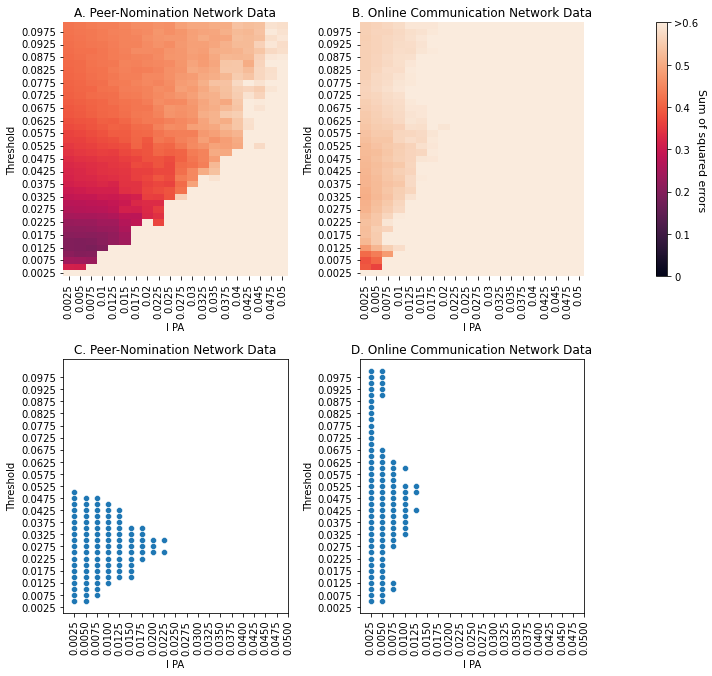

In [13]:
# plot of grid search 2

fig, axs = plt.subplots(2, 3, figsize=(10,9.5), gridspec_kw=dict(width_ratios=[1,1,0.05]))

#kwargs = {'alpha':1,'linewidth':0.5,'linecolor':'k','rasterized':True, 'edgecolor':'k', 'capstyle':'projecting'}
axs[0,0].set_title('A. Peer-Nomination Network Data')
sns.heatmap(nom_error2_df, vmin=0, vmax=0.6, ax = axs[0,0], cbar=False).invert_yaxis()
axs[0,0].set_xlabel('I PA')
axs[0,0].set_ylabel('Threshold')

axs[0,1].set_title('B. Online Communication Network Data')
sns.heatmap(com_error2_df, vmin=0, vmax=0.6, ax = axs[0,1], cbar=False).invert_yaxis()
axs[0,1].set_xlabel('I PA')
axs[0,1].set_ylabel('Threshold')

cbar = fig.colorbar(axs[0,1].collections[0], cax=axs[0,2])
cbar.ax.set_yticklabels(['0','0.1','0.2','0.3','0.4','0.5','>0.6 '])
cbar.set_label('Sum of squared errors', fontsize=11, rotation=270)

# best fitting parameter combinations
axs[1,0].set_title('C. Peer-Nomination Network Data')
sns.scatterplot(data = pars_nomination, x = "ipa", y = "threshold", palette = 'crest', ax=axs[1,0])
axs[1,0].set_xlabel('I PA')
axs[1,0].set_ylabel('Threshold')
axs[1,0].set_yticks([0.0025,0.0075,0.0125,0.0175,0.0225,0.0275,0.0325,0.0375,0.0425,0.0475,
                     0.0525,0.0575,0.0625,0.0675,0.0725,0.0775,0.0825,0.0875,0.0925,0.0975])
axs[1,0].set_xticks([0.0025,0.005,0.0075,0.01,0.0125,0.015,0.0175,0.02,0.0225,0.025,0.0275,
                     0.03,0.0325,0.035,0.0375,0.04,0.0425,0.045,0.0475,0.05])
axs[1,0].tick_params(axis='x', rotation=90)
axs[1,0].set_ylim([0.0, 0.105])
axs[1,0].set_xlim([0.0, 0.05])

axs[1,1].set_title('D. Online Communication Network Data')
sns.scatterplot(data = pars_communication, x = "ipa", y = "threshold",  palette='crest', ax=axs[1,1])
axs[1,1].set_xlabel('I PA')
axs[1,1].set_ylabel('Threshold')
axs[1,1].set_yticks([0.0025,0.0075,0.0125,0.0175,0.0225,0.0275,0.0325,0.0375,0.0425,0.0475,
                     0.0525,0.0575,0.0625,0.0675,0.0725,0.0775,0.0825,0.0875,0.0925,0.0975])
axs[1,1].set_xticks([0.0025,0.005,0.0075,0.01,0.0125,0.015,0.0175,0.02,0.0225,0.025,0.0275,
                     0.03,0.0325,0.035,0.0375,0.04,0.0425,0.045,0.0475,0.05])
axs[1,1].tick_params(axis='x', rotation=90)
axs[1,1].set_ylim([0.0, 0.105])
axs[1,1].set_xlim([0.0, 0.05])
#axs[1,1].legend(loc='right', title="SSE") hue = 'error',

axs[1,2].remove()

plt.tight_layout()

# Save plot
plt.savefig('../output/plots/grid_search2.eps', bbox_inches='tight', format='eps', dpi=500)
plt.show()




## Output of tuned model

In [14]:
# Plot of mean output per run

file = open('../output/tuning/nom_output_cl_3.obj', 'rb')
nom = pickle.load(file)
nom_df = pd.DataFrame(nom)

file = open('../output/tuning/com_output_cl_3.obj', 'rb')
com = pickle.load(file)
com_df = pd.DataFrame(com)

file = open('../output/tuning/nom_output_child_3.obj', 'rb')
nom_ind = pickle.load(file)




In [15]:
by_run_nom =[]
for run in range(len(pars_nomination)):
    by_run_nom.append(pd.DataFrame(nom[run]).mean(axis=1))

avg_by_run_nom = pd.concat(by_run_nom, axis =1)

In [16]:
by_run_com =[]
for run in range(len(pars_communication)):
    by_run_com.append(pd.DataFrame(com[run]).mean(axis=1))

avg_by_run_com = pd.concat(by_run_com, axis =1)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
/Users/davidblok/.pyenv/versions/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


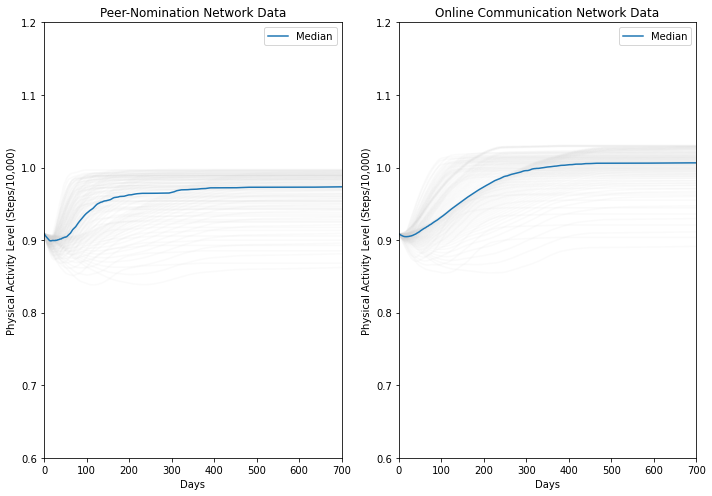

In [17]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,7))


ax1.set_title('Peer-Nomination Network Data')
ax1.set_ylim([0.6, 1.2])
ax1.set_xlim([0,700])
ax1.set_ylabel('Physical Activity Level (Steps/10,000)')
ax1.set_xlabel('Days')
ax1.plot(avg_by_run_nom, color='lightgrey', alpha=0.1)
ax1.plot(avg_by_run_nom.median(axis=1), label="Median")
#ax1.plot(avg_by_run_nom.mean(axis=1), label="Mean")
ax1.legend()

ax2.set_title('Online Communication Network Data')
ax2.set_ylim([0.6, 1.2])
ax2.set_xlim([0,700])
ax2.set_ylabel('Physical Activity Level (Steps/10,000)')
ax2.set_xlabel('Days')
ax2.plot(avg_by_run_com, color='lightgrey', alpha=0.1)
ax2.plot(avg_by_run_com.median(axis=1), label="Median")
#ax2.plot(avg_by_run_com.mean(axis=1), label="Mean")
ax2.legend()



fig.tight_layout()

# Save plot
fig.savefig('../output/plots/grid_search2_runs.eps', bbox_inches='tight', format='eps', dpi=500)
fig.show()


In [14]:
avg_by_run_nom

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.908637,0.908637,0.908637,0.908637,0.908637,0.908637,0.908637,0.908637,0.908637,0.908637,...,0.908637,0.908637,0.908637,0.908637,0.908637,0.908637,0.908637,0.908637,0.908637,0.908637
1,0.907292,0.907750,0.907740,0.908189,0.908194,0.907307,0.906844,0.907729,0.907275,0.908213,...,0.907714,0.907322,0.905557,0.908300,0.907898,0.907953,0.907103,0.908486,0.908131,0.907714
2,0.905955,0.906852,0.906847,0.907747,0.907747,0.905975,0.905082,0.906826,0.905923,0.907790,...,0.906848,0.906003,0.902876,0.908000,0.907268,0.907353,0.905655,0.908339,0.907702,0.906926
3,0.904661,0.905981,0.905957,0.907295,0.907298,0.904772,0.903367,0.905927,0.904603,0.907360,...,0.906174,0.905025,0.900594,0.907709,0.906721,0.906869,0.904522,0.908197,0.907331,0.906249
4,0.903366,0.905179,0.905102,0.906845,0.906854,0.903574,0.901777,0.905047,0.903297,0.906939,...,0.905560,0.904186,0.898419,0.907452,0.906234,0.906498,0.903614,0.908058,0.906954,0.905666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.917614,0.924621,0.913385,0.910047,0.922077,0.928197,0.925639,0.899813,0.905669,0.932265,...,0.994233,0.989851,0.991807,0.995986,0.995069,0.996190,0.992473,0.996737,0.997234,0.995916
1996,0.917614,0.924621,0.913385,0.910047,0.922077,0.928197,0.925639,0.899813,0.905669,0.932265,...,0.994233,0.989851,0.991807,0.995986,0.995069,0.996190,0.992473,0.996737,0.997234,0.995916
1997,0.917614,0.924621,0.913385,0.910047,0.922077,0.928197,0.925639,0.899813,0.905669,0.932265,...,0.994233,0.989851,0.991807,0.995986,0.995069,0.996190,0.992473,0.996737,0.997234,0.995916
1998,0.917614,0.924621,0.913385,0.910047,0.922077,0.928197,0.925639,0.899813,0.905669,0.932265,...,0.994233,0.989851,0.991807,0.995986,0.995069,0.996190,0.992473,0.996737,0.997234,0.995916


In [15]:
by_run_nom[99]

0       0.908637
1       0.907714
2       0.906926
3       0.906249
4       0.905666
          ...   
1995    0.995916
1996    0.995916
1997    0.995916
1998    0.995916
1999    0.995916
Length: 2000, dtype: float64

In [9]:
pd.DataFrame(com[0])

,78.0,81.0,100.0,124.0,125.0,256.0,258.0,261.0,262.0,263.0,...,273.0,292.0,296.0,297.0,298.0,299.0,300.0,301.0,302.0,303.0
0,0.960245,0.967677,0.966309,0.779903,0.915949,0.902567,0.776171,1.031839,0.853125,0.931897,...,0.957903,0.902760,0.905814,0.907797,0.918891,0.937198,0.988239,0.923998,0.921906,0.820202
1,0.959651,0.967160,0.965901,0.778477,0.915444,0.901130,0.775434,1.030328,0.852383,0.929879,...,0.956724,0.902037,0.904442,0.906475,0.918669,0.936299,0.988161,0.922528,0.920567,0.819232
2,0.959079,0.966667,0.965515,0.777070,0.915173,0.900002,0.774715,1.028841,0.851661,0.927883,...,0.955570,0.901338,0.903321,0.905176,0.918470,0.935420,0.988109,0.921080,0.919252,0.818167
3,0.958527,0.966195,0.965150,0.775683,0.914924,0.898893,0.774015,1.027640,0.851267,0.925911,...,0.954439,0.900660,0.901988,0.903899,0.918292,0.934561,0.988081,0.919652,0.917959,0.817292
4,0.958271,0.965747,0.964807,0.774315,0.914697,0.897356,0.773334,1.026461,0.850891,0.923961,...,0.953332,0.900006,0.900310,0.902645,0.918135,0.933723,0.988078,0.918063,0.916877,0.816449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.938353,0.944426,0.958908,0.888029,1.050015,0.743435,0.747544,1.214160,0.916280,0.866948,...,1.002958,1.001949,0.989959,0.812635,0.891534,0.898594,0.972932,0.829309,0.687828,0.903997
1996,0.938353,0.944426,0.958908,0.888029,1.050015,0.743435,0.747544,1.214160,0.916280,0.866948,...,1.002958,1.001949,0.989959,0.812635,0.891534,0.898594,0.972932,0.829309,0.687828,0.903997
1997,0.938353,0.944426,0.958908,0.888029,1.050015,0.743435,0.747544,1.214160,0.916280,0.866948,...,1.002958,1.001949,0.989959,0.812635,0.891534,0.898594,0.972932,0.829309,0.687828,0.903997
1998,0.938353,0.944426,0.958908,0.888029,1.050015,0.743435,0.747544,1.214160,0.916280,0.866948,...,1.002958,1.001949,0.989959,0.812635,0.891534,0.898594,0.972932,0.829309,0.687828,0.903997


In [10]:
pd.DataFrame(com[1])

,78.0,81.0,100.0,124.0,125.0,256.0,258.0,261.0,262.0,263.0,...,273.0,292.0,296.0,297.0,298.0,299.0,300.0,301.0,302.0,303.0
0,0.960245,0.967677,0.966309,0.779903,0.915949,0.902567,0.776171,1.031839,0.853125,0.931897,...,0.957903,0.902760,0.905814,0.907797,0.918891,0.937198,0.988239,0.923998,0.921906,0.820202
1,0.959948,0.967419,0.966105,0.779323,0.915803,0.901993,0.775803,1.031216,0.852754,0.930888,...,0.957313,0.902399,0.905128,0.907136,0.918780,0.936748,0.988200,0.923263,0.921237,0.819803
2,0.959657,0.967166,0.965906,0.778747,0.915662,0.901424,0.775438,1.030598,0.852388,0.929884,...,0.956730,0.902043,0.904447,0.906481,0.918675,0.936304,0.988168,0.922534,0.920573,0.819352
3,0.959509,0.966919,0.965713,0.778175,0.915526,0.900860,0.775079,1.029986,0.852027,0.928887,...,0.956153,0.901693,0.903770,0.905831,0.918575,0.935864,0.988141,0.921809,0.920010,0.818905
4,0.959227,0.966678,0.965526,0.777608,0.915396,0.900301,0.774724,1.029380,0.851825,0.927895,...,0.955582,0.901349,0.903098,0.905187,0.918480,0.935430,0.988121,0.921090,0.919358,0.818463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.918663,0.973911,0.970177,0.773153,1.022816,0.768325,0.754925,1.208535,0.923707,0.881346,...,1.011601,0.977549,1.067206,0.877080,0.929506,0.931431,0.974920,0.838246,0.706713,0.907359
1996,0.918663,0.973911,0.970177,0.773153,1.022816,0.768325,0.754925,1.208535,0.923707,0.881346,...,1.011601,0.977549,1.067206,0.877080,0.929506,0.931431,0.974920,0.838246,0.706713,0.907359
1997,0.918663,0.973911,0.970177,0.773153,1.022816,0.768325,0.754925,1.208535,0.923707,0.881346,...,1.011601,0.977549,1.067206,0.877080,0.929506,0.931431,0.974920,0.838246,0.706713,0.907359
1998,0.918663,0.973911,0.970177,0.773153,1.022816,0.768325,0.754925,1.208535,0.923707,0.881346,...,1.011601,0.977549,1.067206,0.877080,0.929506,0.931431,0.974920,0.838246,0.706713,0.907359
